In [461]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#%matplotlib notebook

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
home directory is /home/heineike/
y1000plus_tools dir is /home/heineike/github/y1000plus_tools/
y1000plus data dir is /home/heineike/genomes/y1000plus/
Importing y1000plus_tools.py
importing io_library.py
sys.path : 

['/home/heineike/github/y1000plus_tools/scripts', '', '/home/lab/envs/seqanalysis/lib/python35.zip', '/home/lab/envs/seqanalysis/lib/python3.5', '/home/lab/envs/seqanalysis/lib/python3.5/plat-linux', '/home/lab/envs/seqanalysis/lib/python3.5/lib-dynload', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/argh-0.26.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/glob2-0.4.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/mmtf_python-1.0.2-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/IPython/extensions', '/home/heineike/.ipython', '/home/heineike/github/y1000

In [4]:
# ## make std libraries into a %run thing

# # %load std_libraries.py
# #Indicate operating environment and import core modules
# import os 
# location_input = input("what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other")
# location_dict = {'a': "C:\\Users\\BMH_work\\", 'b': "/home/heineike/",
#                  'c': "C:\\Users\\Ben\\Documents\\", 'd':'you need to add your location to the location_dict'}
# home_dir = location_dict[location_input]
# print("home directory is " + home_dir)
# base_dir = home_dir + os.path.normpath('github/y1000plus_tools') + os.sep
# print("y1000plus_tools dir is " + base_dir )
# y1000plus_dir_options = {'b':home_dir + os.path.normpath("genomes/y1000plus") + os.sep, 
#                          'c': home_dir + os.path.normpath('github/expression_broad_data/expression_data/promoter_phylogenies/y1000plus') + os.sep
#                         }
# y1000plus_dir = y1000plus_dir_options[location_input]
# print("y1000plus data dir is " + y1000plus_dir)

# import sys

# if not(base_dir in sys.path): 
#     sys.path.append(base_dir)
#     print("Added " + base_dir + " to path" )

# print("Importing y1000plus_tools.py")
# from core import y1000plus_tools

# io_library_path = home_dir + os.path.normpath('github/expression_broad_data/core')
# if not(io_library_path in sys.path):
#     sys.path.append(io_library_path)
#     print("Added " + io_library_path + " to path" )

# print("importing io_library.py")
# import io_library
# print('sys.path : \n')
# print(sys.path)

# %load_ext autoreload
# %autoreload 2


# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colors as colors
# ## Add to std library
# import pickle
# import subprocess


# from Bio.Seq import Seq
# from Bio.Alphabet import generic_dna
# from Bio import SeqIO
# from ete3 import Tree, SeqMotifFace, TreeStyle, add_face_to_node, RectFace, NodeStyle  
# #ete3 is not officially supported on windows, and so must be loaded via pip: 
# # pip install -U https://github.com/etetoolkit/ete/archive/qt5.zip
# # ref: https://groups.google.com/forum/#!topic/etetoolkit/6NblSBPij4o
# #20181031: got this error message: twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.

# # In order to view ete3 created trees on the gpucluster, you need to use a virtual X server:
# from pyvirtualdisplay import Display
# display = Display(visible=False, size=(1024, 768), color_depth=24)
# display.start()

In [5]:
y1000_species = pd.read_csv(y1000plus_dir + "y1000_species_table.csv", index_col=0)

#not including outgroup species
y1000_species_subset = y1000_species[y1000_species['Major clade']!='outgroup']

# #Select only clades of interest: 
# clades_of_interest = {'Saccharomycetaceae','Saccharomycodaceae','Phaffomycetaceae','CUG-Ser2','CUG-Ser1','Pichiaceae','CUG-Ala'}
# #clades_of_interest = {'Saccharomycetaceae'}
# y1000_species_subset = y1000_species[y1000_species['Major clade'].isin(clades_of_interest)]

outgroup = 'Lipomyces starkeyi'
outgroup_orig_genome = y1000_species[y1000_species['Species name']==outgroup]['original_genome_id'].values[0]
#'Yarrowia lipolytica'
# #outgroup = 'Hanseniaspora vineae'  #For EGO2/4 - only Sacch so use different outgroup
# y1000_species_subset = pd.concat([y1000_species_subset, y1000_species[y1000_species['Species name']==outgroup]])


In [8]:

gois = list(aa_met_genes.index)

#Make promoter files for various genes of interest
#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
# target_y1000_id = scer_lookup.loc[goi,'y1000_id']

y1000_ids = dict(scer_lookup.loc[gois,'y1000_id'])
y1000_id_list = [y1000_ids[goi] for goi in gois]

goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_species_subset)

more than one goi in same orthogroup :OG1030 found_genes: 
['110_4199', '110_4697']
more than one goi in same orthogroup :OG1096 found_genes: 
['110_946', '110_4987']
more than one goi in same orthogroup :OG1115 found_genes: 
['110_827', '110_449']
more than one goi in same orthogroup :OG1210 found_genes: 
['110_1406', '110_425']
more than one goi in same orthogroup :OG1313 found_genes: 
['110_447', '110_3134']
more than one goi in same orthogroup :OG1433 found_genes: 
['110_634', '110_2626']
more than one goi in same orthogroup :OG1516 found_genes: 
['110_695', '110_4813']
more than one goi in same orthogroup :OG1675 found_genes: 
['110_4331', '110_1965']
more than one goi in same orthogroup :OG1892 found_genes: 
['110_2273', '110_217']
more than one goi in same orthogroup :OG2588 found_genes: 
['110_1713', '110_4392']


In [101]:
#Test to see if orthogroup has something from outgroup: 

y1000_id_outgroup = y1000_species_subset[y1000_species_subset['Species name']==outgroup]['spec_og_id'].values[0]

outgroup_gene = ''
for gene in og_genes: 
    if gene.split('_')[0]== str(y1000_id_outgroup):
        outgroup_gene = gene

if outgroup_gene =='': 
    print(outgroup + ' has no proteins in og ' + og + ' for ' + goi_common_name + '. Pick another outgroup')
else: 
    print('outgroup gene = ' + outgroup_gene)
    #Results: 
#GPM2/GPM3 no ortholog in Y. Lipolitica
#TPK1/TPK3 no ortholog in Y. lipolitica (interesting...)  
# Need to find new outgroup for those

outgroup gene = 66_2967


In [96]:
specs_in_og = []
for gene in og_genes: 
    specs_in_og.append(gene.split('_')[0])

#set(specss_in_og
set(y1000_species_subset[y1000_species_subset['spec_og_id'].isin(set(specs_in_og))]['Major clade'])

{'Alloascoideaceae',
 'CUG-Ala',
 'CUG-Ser1',
 'CUG-Ser2',
 'Dipodascaceae/Trichomonascaceae',
 'Lipomycetaceae',
 'Phaffomycetaceae',
 'Pichiaceae',
 'Saccharomycetaceae',
 'Saccharomycodaceae',
 'Sporopachydermia clade',
 'Trigonopsidaceae'}

In [99]:
#Lipomyces is a good outgroup set: 
# 'Lipomyces oligophaga', 'Lipomyces starkeyi',
# 'Lipomyces suomiensis', 'Lipomyces doorenjongii',
# 'Lipomyces mesembrius', 'Lipomyces kononenkoae',
# 'Lipomyces japonicus', 'Lipomyces lipofer', 'Lipomyces arxii'

#'Lipomycetaceae'

#after that try: 
#Trigonopsidaceae
#Dipodascaceae/Trichomonascaceae
#'Alloascoideaceae'
#'Sporopachydermia clade'
#'Pichiaceae'
#'CUG-Ser2'
#'Phaffomycetaceae'
# 'Saccharomycodaceae'

#Test to see if orthogroup has anything from lipomyces: 
outgroup_clade =  'Lipomycetaceae'
y1000_id_possible_outgroups = y1000_species_subset[y1000_species_subset['Major clade']==outgroup_clade]['spec_og_id'].values
y1000_id_possible_outgroups = [str(y1000_spec_id) for y1000_spec_id in y1000_id_possible_outgroups]


outgroup_genes = []
for gene in og_genes: 
    if gene.split('_')[0] in y1000_id_possible_outgroups:
        outgroup_genes.append(gene)

if len(outgroup_genes) ==0: 
    print(goi_common_name + ' orthogroup ' + og + ' has no proteins in the major clade ' + outgroup_clade + '. Pick another outgroup')
else:
    print(outgroup_genes)

['209_5519', '215_1546', '213_2685', '210_1701', '66_2967', '212_341', '214_680', '216_669', '211_5700']


In [53]:
#For a given goi, get y1000 promoters and proteins and deposit into a file
#'GDH1'  #GDH1 in the same orthogroup as GDH3
#'LYS4'  

L_prom = 1000

goi_common_name =  'LYS4'
goi = aa_met_genes[aa_met_genes['Scer_gene']==goi_common_name].index[0]
goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
og = goi_og_lookup[goi_y1000_id]
og_genes = og_genes_lookup[og]


#For a given orthogroup extract promoters
og_genes_y1000_gene_id = y1000plus_tools.extract_promoters(L_prom, og, og_genes, y1000_species_subset, fname_string=goi_common_name)
print(goi_common_name + ' promoter extraction complete')

protein_fname = goi_common_name + '_' + og
y1000plus_tools.extract_protein_seqs(og_genes, protein_fname, y1000_species_subset)
print(goi_common_name + ' protein sequence extraction complete')

promoter region extends past the scaffold, genome_name = spathaspora_gorwiae Gene = Seq_6517, L_prom = 1000
promoter region extends past the scaffold, genome_name = yHMPu5000034673_blastobotrys_nivea_160519 Gene = Seq_2359, L_prom = 1000
promoter region extends past the scaffold, genome_name = yHMPu5000034622_pichia_occidentalis_160519 Gene = Seq_1124, L_prom = 1000
LYS4 promoter extraction complete
yHAB166_kazachstania_yakushimaensis_160519
yHMPu5000026197_brettanomyces_custersianus_160519
eremothecium_cymbalariae
metschnikowia_lockheadii
yHMPu5000035690_candida_vartiovaarae_160613
candida_orthopsilosis
yHMPu5000034950_citeromyces_hawaiiensis_160519
yHMPu5000035037_candida_montana_160519
saccharomyces_arboricola
yHMPu5000041693_debaryomyces_nepalensis_160928
yHMPu5000034614_saturnispora_silvae_160519
yHMPu5000035033_candida_cretensis_160519
lachancea_thermotolerans
yHMPu5000041743_candida_hawaiiana_160928
yHMPu5000034957_hanseniaspora_osmophila_160519
zygosaccharomyces_bailii
yHMPu500

metschnikowia_aberdeeniae
yHMPu5000034742_lipomyces_suomiensis_160519
wickerhamomyces_ciferrii
yHMPu5000034749_lipomyces_mesembrius_160519
eremothecium_coryli
yHMPu5000034632_candida_athensensis_160519
hanseniaspora_uvarum
yHMPu5000035645_yarrowia_divulgata_160519
ogataea_polymorpha
yHMPu5000035658_starmera_amethionina_160613
yHMPu5000035641_yamadazyma_scolyti_160613
yHMPu5000041818_magnusiomyces_tetrasperma_160928
yHMPu5000035652_torulaspora_maleeae_160613
starmerella_bombicola_JCM9596
yHMPu5000035643_yarrowia_bubula_160519
yHMPu5000034893_ogataea_philodendra_160519
yHMPu5000034884_peterozyma_toletana_160519
ogataea_methanolica
yHMPu5000034998_cephaloascus_albidus_160519
yHMPu5000034899_ogataea_kodamae_160519
eremothecium_sinecaudum
yHMPu5000034990_candida_corydali_160519
sporopachydermia_quercuum
yHMPu5000034637_ogataea_populiabae_160519
yHAB133_kazachstania_unispora_160519
candida_glabrata
yHMPu5000026274_komagataella_populi_160519
nadsonia_fulvescens_var_elongata
yHMPu5000034979_cy

In [30]:
#For a given orthogroup extract promoters
y1000plus_tools.extract_promoters(L_prom, og, og_genes, y1000_species_subset, fname_string=goi_common_name)
print(goi_common_name + ' promoter extraction complete')

promoter region extends past the scaffold, genome_name = yHMPu5000034673_blastobotrys_nivea_160519 Gene = Seq_2359, L_prom = 700
promoter region extends past the scaffold, genome_name = spathaspora_gorwiae Gene = Seq_6517, L_prom = 700
promoter region extends past the scaffold, genome_name = yHMPu5000034622_pichia_occidentalis_160519 Gene = Seq_1124, L_prom = 700
LYS4 promoter extraction complete


In [73]:
#y1000_species_subset = y1000_species[y1000_species['Major clade']!='outgroup']
#set(y1000_species_subset['Major clade'])
list(y1000_species[y1000_species['Major clade']=='Lipomycetaceae']['Species name'].values

array(['Lipomyces oligophaga', 'Lipomyces starkeyi',
       'Lipomyces suomiensis', 'Lipomyces doorenjongii',
       'Lipomyces mesembrius', 'Lipomyces kononenkoae',
       'Lipomyces japonicus', 'Lipomyces lipofer', 'Lipomyces arxii'], dtype=object)

In [110]:
# Mafft command 

#Make tree: 

#Use Mafft to construct an MSA

#goi_common_name and og already set above

protein_fname_base = y1000plus_dir + os.path.normpath('proteins_og/' + goi_common_name + '_' + og)


#Command: 
mafft_command = ['mafft', '--genafpair', '--maxiterate', '1000', 
                protein_fname_base + '.fasta', 
                '>',
                protein_fname_base + '_aln.fasta']

#Running it from this notebook seems slow
#!{" ".join(mafft_command)}

print(" ".join(mafft_command))

#This is the E-ENS-i algorithm which is suitable for conserved regions separated by long unaligned gaps. https://mafft.cbrc.jp/alignment/software/algorithms/algorithms.html
#tree command: (designated outgroup)

#
outgroup_gene = None
prot_seqs = SeqIO.parse(protein_fname_base + '.fasta', "fasta")
for seq in prot_seqs: 
    if seq.id.split('Seq')[0]== outgroup_orig_genome+'_':
    #if seq.id.split('Seq')[0]=='hanseniaspora_vinae_':
        outgroup_gene = seq.id
        
if outgroup_gene == None: 
    print('No yarrowia_lipolytica ortholog - need to pick a different outgroup')

#Note: for iqtree to run you need to activate the seqanalysis python environment: 
#. activate /home/lab/envs/seqanalysis

iqtree_command = ["iqtree", 
                  "-s" , protein_fname_base + '_aln_trimmed.fasta',
                  "-nt", "AUTO",  #automatically determines number of threads 
                  "-o", outgroup_gene]
print(" ".join(iqtree_command))

#Current trimming protocol - open up on Jalview and trim by eye. Save as _trimmed.fasta, then find and replace
# all "/" at the end of each gene name with a space. 


# #Use the MSA to build a tree

# #from that tree for all post WGD species, 
#     #see if gene is closer to "low" or "high" goi.  Assign pre_wgh, low, or high label
#     #could verify that outgroup doesn't appear between target and S.Cer low or high gene as well. 
    
# #Order search results based on the tree

mafft --genafpair --maxiterate 1000 /home/heineike/genomes/y1000plus/proteins_og/LYS4_OG1111.fasta > /home/heineike/genomes/y1000plus/proteins_og/LYS4_OG1111_aln.fasta
iqtree -s /home/heineike/genomes/y1000plus/proteins_og/LYS4_OG1111_aln_trimmed.fasta -nt AUTO -o lipomyces_starkeyi_Seq_2968


In [34]:
#Convert promoter fasta for FIMO, also make dictionary for converting back

fasta_in = '/home/heineike/genomes/y1000plus/promoter_sets/OG1111_LYS4.fasta'
fasta_out = '/home/heineike/genomes/y1000plus/promoter_sets/OG1111_LYS4_fimo.fasta'

gene_id_to_y1000_id = {}
with open(fasta_out,'w') as f_out: 
    with open(fasta_in,'r') as f_in: 
        for line in f_in: 
            line_out = line
            if line[0]=='>':
                y1000_id = line.split()[1].split('=')[1]
                line_out = '>' + y1000_id + '\n'
                species = line.split()[0].split('=')[1]
                gene_id = line.split()[2].split('=')[1]
                gene_id_to_y1000_id[species + '@' + gene_id] = y1000_id
            f_out.write(line_out)


In [93]:
motif_hit_params = {'GCN4': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme'),
                    'LYS14':(1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme') 
                   }
promoter_fname = y1000plus_dir + 'promoter_sets/' + og + '_' + goi_common_name + '_fimo.fasta'
output_dir = y1000plus_dir + 'fimo_results' + os.sep
motif_in_file = 'All'  #If there are multiple motifs in a file, this picks them out. 

if motif_in_file == "All":
    motif_arg = []
else:
    motif_arg = ["--motif",motif_in_file]


for motif_name, (thresh, motif_fname) in motif_hit_params.items(): 
    
    fname_prefix = og + '_' + goi_common_name + '_' + motif_name
    fimo_command = ([ home_dir + "meme/bin/fimo",
                      "--oc", output_dir,
                      "--verbosity", "1",
                      "--thresh", str(thresh)] +
                     motif_arg + 
                     [ motif_fname,
                       promoter_fname]
                   )
    
    print('fimo command:\n' + ' '.join(fimo_command))

    fimo_output = subprocess.run(fimo_command,stdout = subprocess.PIPE) 

    print("fimo output return code = " + str(fimo_output.returncode))

    #change file prefix and delete output other than .txt file
    files_to_change = ['cisml.xml', 'fimo.html', 'fimo.tsv','fimo.xml', 'fimo.gff']

    for file_to_change in files_to_change: 
        full_file_to_change = output_dir +  file_to_change   
        fimo_fname_out = output_dir + fname_prefix + '_' + file_to_change
        os.rename(full_file_to_change, fimo_fname_out)
        #os.remove(full_file_to_change)


fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1111_LYS4_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1111_LYS4_fimo.fasta
fimo output return code = 0


In [217]:
-np.log10(2.0e-4)

3.6989700043360187

In [218]:
-np.log10(1.3e-4)

3.8860566476931631

LYS14
GCN4


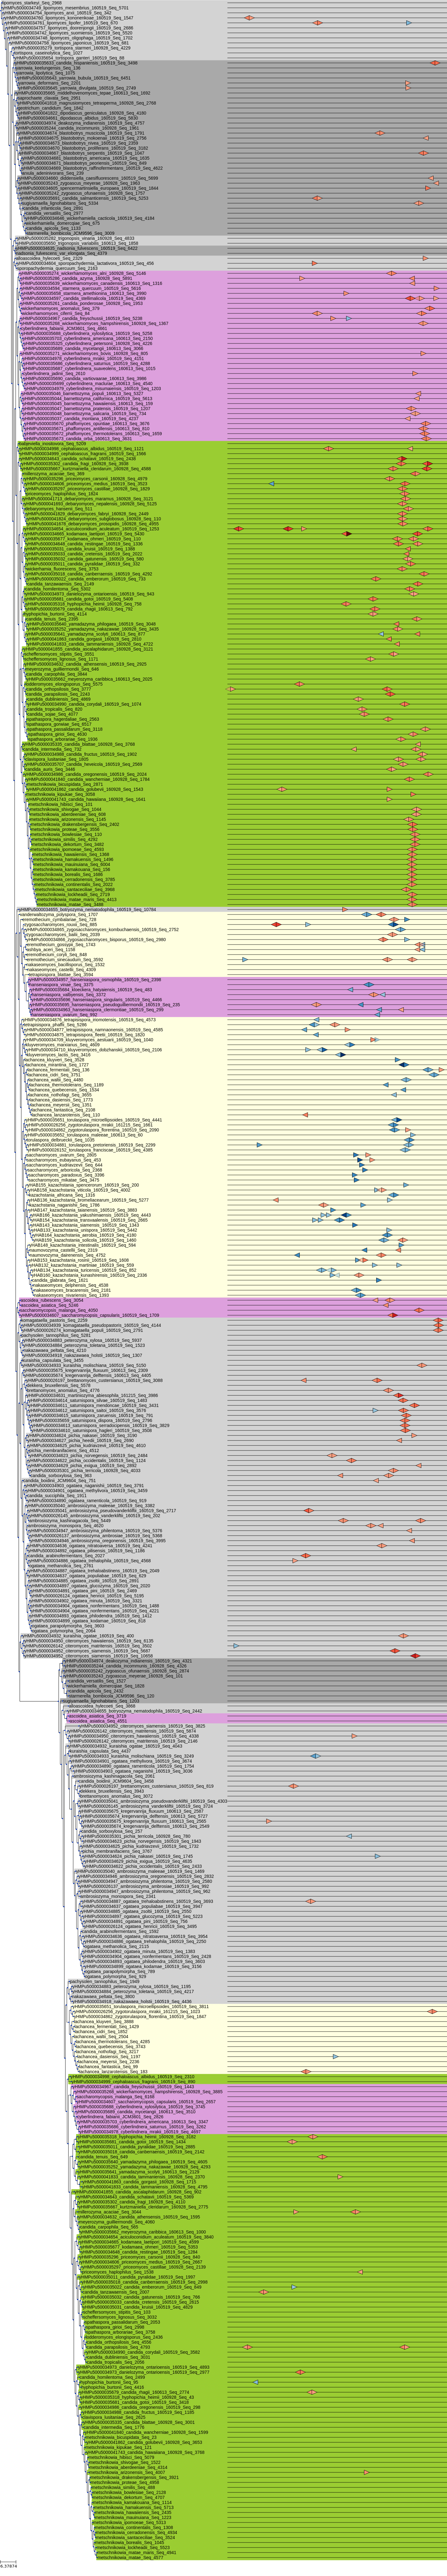

In [343]:
## add motifs to the same promoter image 

#Visualize the tree with promoter binding sites localized for LYS4

goi_common_name =  'LYS4'
goi = aa_met_genes[aa_met_genes['Scer_gene']==goi_common_name].index[0]
goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
og = goi_og_lookup[goi_y1000_id]
# og_genes = og_genes_lookup[og]

sacc_families = {'Candida': 'Post_WGH',
                 'Kazachstania': 'Post_WGH',
                 'Nakaseomyces': 'Post_WGH',
                 'Naumovozyma': 'Post_WGH',
                 'Saccharomyces': 'Post_WGH',
                 'Tetrapisispora': 'Post_WGH',
                 'Vanderwaltozyma': 'Post_WGH',
                 'Yueomyces': 'Post_WGH',
                 'Zygosaccharomyces': 'ZT',
                 'Zygotorulaspora': 'ZT',
                 'Torulaspora': 'ZT',
                 'Kluyveromyces': 'KLE',
                 'Lachancea': 'KLE',
                 'Eremothecium': 'KLE',
                 'Ashbya': 'KLE'
                }


#less_nonsacc=False    #flag for filtering some species

#Color Node by species: 
# sacc_colors = {'KLE': "#C6AFE9", 
#                'ZT': "YellowGreen",
#                'Post_WGH': "LightYellow"
#               }

# maj_clade_colors = {'Saccharomycodaceae': "BlanchedAlmond",
#     'Phaffomycetaceae': "Bisque",
#     'CUG-Ser2': 'NavajoWhite',
#     'CUG-Ser1': "Wheat",
#     'Pichiaceae': "BurlyWood",
#     'CUG-Ala':"Tan"
#     }

#pre_wgd_purple = "#bb95d6"

outgroup_color = 'lightgray'
between_color = 'plum'
maj_clade_colors = {'Saccharomycetaceae': "LightYellow",
    'Saccharomycodaceae': between_color,
    'Phaffomycetaceae': between_color,
    'CUG-Ser2': between_color,
    'CUG-Ser1': "YellowGreen",
    'Pichiaceae': outgroup_color,
    'CUG-Ala': outgroup_color,
    'Lipomycetaceae': outgroup_color, 
    'Trigonopsidaceae': outgroup_color, 
    'Dipodascaceae/Trichomonascaceae': 'darkgray',   #outgroup
    'Alloascoideaceae': outgroup_color, 
    'Sporopachydermia clade': outgroup_color
    }


protein_fname_base = y1000plus_dir + os.path.normpath('proteins_og/' + goi_common_name + '_' + og)
tree_fname = protein_fname_base + '_aln_trimmed.fasta.treefile'
t = Tree(tree_fname)
t.ladderize()
L_prom = 700
height = 15
seq = '-'*L_prom


cmap_base = {'GCN4': 'Reds', 'LYS14': 'Blues'}
cmap_low_cutoff = 0.2

cmaps = {}
for motif_name, cmap_base_name in cmap_base.items():
    cmap = cm.get_cmap(cmap_base_name)
    cmap_trunc = colors.LinearSegmentedColormap.from_list(cmap_base_name + '_' + 'trunc', cmap(np.linspace(cmap_low_cutoff,1.0,100)))
    cmaps[motif_name] = cmap_trunc

#(length, thresh)
motif_params = {'GCN4': (16,-np.log10(2.0e-4)), 'LYS14': (16,-np.log10(1.79e-05))}


found_motifs_dict = {}
for node in t.iter_leaves():  
    found_motifs_dict[node.name]=[]

    
cmap_norm_score = {}
for motif_name, (motif_len, motif_score_thresh) in motif_params.items(): 
    print(motif_name)
    fimo_hits = pd.read_table(y1000plus_dir + 'fimo_results/' + og + '_' + goi_common_name + '_' + motif_name + '_fimo.tsv',
                         engine='python', skipfooter=4)

    #set up colormap
    cmap_score = cmaps[motif_name]
    
    pvals_nlog10 = -np.log10(fimo_hits['p-value'])
    vmin = min(pvals_nlog10)
    vmax = max(pvals_nlog10)
    norm_score = colors.Normalize(vmin=vmin, vmax=vmax)
    
    cmap_norm_score[motif_name] = (cmap_score, norm_score)

    #For each node in the tree:
    for node in t.iter_leaves():  
        #Get the promoter sequence with motif info, make it into a motif list
        species = '_'.join(node.name.split('_')[:-2])
        #here gene_id includes the species
        gene_id = species + '@' + '_'.join(node.name.split('_')[-2:])

        #color node by major clade / family if in Sacch clade
        species = '_'.join(node.name.split('_')[:-2])
        row = y1000_species_subset[y1000_species_subset['original_genome_id']==species]
        maj_clade = row['Major clade'].values[0]

#         if maj_clade == 'Saccharomycetaceae':
#             genus = row['Genus'].values[0]
#             node_color = sacc_colors[sacc_families[genus]]
#         elif species == 'yarrowia_lipolytica':
#         #elif species == 'hanseniaspora_vinae':
#             node_color = 'LightGrey'
#        else: 
        node_color = maj_clade_colors[maj_clade]

        nstyle = NodeStyle()
        nstyle['bgcolor']=node_color
        node.set_style(nstyle)

        y1000_id = gene_id_to_y1000_id[gene_id] 

        if y1000_id in set(fimo_hits['sequence_name']): 
            hits = fimo_hits[fimo_hits['sequence_name']==y1000_id]

            for hit in hits.iterrows():
                direction = hit[1]['strand']
                shape = '>'
                start = hit[1]['start']
                stop = hit[1]['start'] + motif_len
                if direction == '-':
                    shape = '<'
                    start = hit[1]['start']-motif_len
                    stop = hit[1]['start']
                pval_neglog10 = -np.log10(hit[1]['p-value'])
                if pval_neglog10>motif_score_thresh: 
                    rgb = colors.to_hex(cmap_score(norm_score(pval_neglog10)))
                    found_motifs_dict[node.name].append([start,stop,shape,None, height, "black", rgb, None])



for node in t.iter_leaves():  
    seqFace = SeqMotifFace(seq, motifs=found_motifs_dict[node.name], seq_format="-")
    node.add_face(seqFace, column=0, position="aligned")
#     if gene_id == 'saccharomyces_uvarum@Seq_2805':
#         print(gene_id)
#         a = node
            

t.render('%%inline')
# fname = home_dir + 'scratch/' + goi_common_name + '.svg'
# t.render(fname)

In [140]:
#Checking individual promoters

motif_name = 'GCN4'
fimo_hits = pd.read_table(y1000plus_dir + 'fimo_results/' + og + '_' + goi_common_name + '_' + motif_name + '_fimo.tsv',
                         engine='python', skipfooter=4)
fimo_hits




motif_id motif_alt_id sequence_name  start  stop strand     score  \
0    MA0303.1         GCN4      198_5429    380   400      +  17.88890   
1    MA0303.1         GCN4      191_2437    556   576      +  16.60000   
2    MA0303.1         GCN4      173_1708    527   547      +  16.38890   
3    MA0303.1         GCN4     246_10657    599   619      -  16.33330   
4    MA0303.1         GCN4      287_3937    638   658      +  16.24440   
5    MA0303.1         GCN4      194_1252    193   213      -  16.16670   
6    MA0303.1         GCN4      186_3985    545   565      +  15.87780   
7    MA0303.1         GCN4      194_1252     35    55      -  15.66670   
8    MA0303.1         GCN4     246_10657    599   619      +  15.56670   
9    MA0303.1         GCN4       342_884    155   175      +  15.52220   
10   MA0303.1         GCN4      194_1252    193   213      +  15.48890   
11   MA0303.1         GCN4      306_4587    636   656      -  15.45560   
12   MA0303.1         GCN4       342_884    155   175      -  14.94440   
13   MA0303.1         GCN4      198_5429    606   626      -  14.93330   
14   MA0303.1         GCN4      194_1252     35    55      +  14.81110   
15   MA0303.1         GCN4      169_4368    583   603      -  14.80000   
16   MA0303.1         GCN4      306_4587    636   656      +  14.78890   
17   MA0303.1         GCN4      198_5429    606   626      +  14.71110   
18   MA0303.1         GCN4      246_5686    534   554      +  14.48890   
19   MA0303.1         GCN4      267_2716    259   279      -  14.47780   
20   MA0303.1         GCN4      246_5686    534   554      -  14.45560   
21   MA0303.1         GCN4      287_3937    638   658      -  14.41110   
22   MA0303.1         GCN4       24_2242    519   539      +  14.35560   
23   MA0303.1         GCN4       52_2258    672   692      +  14.27780   
24   MA0303.1         GCN4      198_5429    380   400      -  14.26670   
25   MA0303.1         GCN4       23_3776    509   529      -  14.21110   
26   MA0303.1         GCN4      194_1252    639   659      +  14.17780   
27   MA0303.1         GCN4       24_2242    519   539      -  14.05560   
28   MA0303.1         GCN4      169_4368    583   603      +  13.98890   
29   MA0303.1         GCN4      175_3430    596   616      +  13.94440   
..        ...          ...           ...    ...   ...    ...       ...   
896  MA0303.1         GCN4      265_4236    619   639      -   4.68889   
897  MA0303.1         GCN4      225_1522    492   512      +   4.68889   
898  MA0303.1         GCN4       67_2435    381   401      +   4.67778   
899  MA0303.1         GCN4      191_5368    283   303      -   4.66667   
900  MA0303.1         GCN4       57_1428    378   398      -   4.66667   
901  MA0303.1         GCN4      207_1039     16    36      -   4.65556   
902  MA0303.1         GCN4      207_1039     16    36      +   4.65556   
903  MA0303.1         GCN4      264_2614    468   488      +   4.65556   
904  MA0303.1         GCN4       60_1350     57    77      +   4.64444   
905  MA0303.1         GCN4      256_3581    636   656      -   4.63333   
906  MA0303.1         GCN4       54_1851    504   524      +   4.63333   
907  MA0303.1         GCN4      207_1039    509   529      -   4.62222   
908  MA0303.1         GCN4       30_2055    548   568      -   4.62222   
909  MA0303.1         GCN4      189_3953    372   392      +   4.61111   
910  MA0303.1         GCN4      305_1691    607   627      +   4.61111   
911  MA0303.1         GCN4      336_4794    560   580      -   4.60000   
912  MA0303.1         GCN4      315_1433    280   300      +   4.60000   
913  MA0303.1         GCN4      153_2664    454   474      -   4.58889   
914  MA0303.1         GCN4       254_297    114   134      +   4.57778   
915  MA0303.1         GCN4       28_2148    347   367      +   4.57778   
916  MA0303.1         GCN4      262_4828    473   493      +   4.57778   
917  MA0303.1         GCN4       34_2825    244   264      +   4.56667   
918  MA03

In [143]:
#gene_id = 'dekkera_bruxellensis@Seq_5578'
#gene_id = 'saccharomyces_mikatae@Seq_3475'
#gene_id = 'torulaspora_delbrueckii@Seq_1035'
#gene_id = 'saccharomyces_arboricola@Seq_2368'
gene_id = 'candida_dubliniensis@Seq_4869'
y1000_id = gene_id_to_y1000_id[gene_id] 
    
hits = fimo_hits[fimo_hits['sequence_name']==y1000_id]
hits

motif_id motif_alt_id sequence_name  start  stop strand    score  \
290  MA0303.1         GCN4       18_4868    417   437      -  9.46667   
293  MA0303.1         GCN4       18_4868    417   437      +  9.42222   
476  MA0303.1         GCN4       18_4868    447   467      +  7.70000   
728  MA0303.1         GCN4       18_4868    447   467      -  5.70000   

      p-value  q-value       matched_sequence  
290  0.000123    0.291  CCGTGAATGAGTCAGTAGTTT  
293  0.000126    0.294  AAACTACTGACTCATTCACGG  
476  0.000302    0.437  CGATACAGGAGTCACAAAAAT  
728  0.000658    0.619  ATTTTTGTGACTCCTGTATCG

LYS14
GCN4


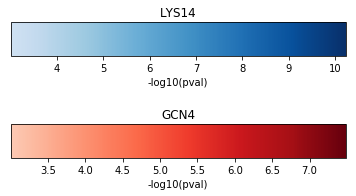

In [212]:
fig, axarr = plt.subplots(2,1, figsize=(6, 1))
#fig.subplots_adjust(bottom=0.5)

jj = 0
for motif_name, (cmap, norm) in cmap_norm_score.items(): 
    print(motif_name)
    ax = axarr[jj] 
    cb1 = colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm=norm,
                                    orientation='horizontal')
    cb1.set_label('-log10(pval)')
    ax.set_title(motif_name)
    jj = jj + 1

fig.subplots_adjust(hspace=2, bottom = -1)
#fig.save(home_dir + 'scratch/' + goi_common_name + '_colorbar.svg')

## Load all Metabolism genes

In [328]:
#NOtice how many of these genes are very close on the genome MPC3, SOL4, ENO1, GND2

aa_met_genes = pd.read_csv(base_dir + os.path.normpath('data/gcn4_liron/aa_metabolism_genes.csv'), index_col=0)

list(aa_met_genes['Scer_gene'])

['ARO3',
 'ARO4',
 'ARO1',
 'ARO2',
 'ARO7',
 'TYR1',
 'ARO9',
 'ARO8',
 'TRP3',
 'TRP2',
 'TRP1',
 'TRP5',
 'PHA2',
 'ILV6',
 'ILV2',
 'ILV5',
 'ILV3',
 'LEU9',
 'LEU4',
 'BAT2',
 'BAT1',
 'LEU1',
 'LEU2',
 'ILV1',
 'MET3',
 'MET14',
 'MET16',
 'MET7',
 'MET5',
 'MET10',
 'MET17',
 'MET6',
 'MET2',
 'HOM3',
 'HOM2',
 'HOM6',
 'CYS4',
 'CYS3',
 'STR2',
 'SAM2',
 'SAM1',
 'STR3',
 'HIS1',
 'HIS4',
 'HIS6',
 'HIS7',
 'HIS3',
 'HIS5',
 'HIS2',
 'PRS5',
 'PRS1',
 'PRS3',
 'PRS2',
 'PRS4',
 'GLN1',
 'GLT1',
 'GDH1',
 'GDH3',
 'ALT1',
 'ARG5,6',
 'ARG8',
 'ARG7',
 'ARG3',
 'ARG1',
 'ARG4',
 'ARG2',
 'AAT2',
 'AAT1',
 'ASN1',
 'ASN2',
 'PYC1',
 'PYC2',
 'SER33',
 'SER3',
 'SER1',
 'SER2',
 'AGX1',
 'GLY1',
 'SHM2',
 'SHM1',
 'LYS21',
 'LYS20',
 'LYS4',
 'LYS12',
 'LYS2',
 'LYS9',
 'LYS1',
 'LYS14',
 'PRO1',
 'PRO2',
 'PRO3',
 'THR1',
 'THR4']

In [22]:
##Checking to see if any of the metabolism genes are in my differentially regulated paralog set
fname = home_dir +  os.path.normpath('/github/expression_broad_data/expression_data/kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

ohnologs_goi.set_index('Ancestor', inplace=True)
ohnologs_expression_sorted.set_index('Ancestor', inplace=True)
ohnologs_goi.rename(columns={'sc_genename_' + level: 'genename_'+level for level in ['low','high']},inplace=True)


In [25]:
(set(ohnologs_goi['genename_low']) | set(ohnologs_goi['genename_high'])) & set(aa_met_genes.index)
#set([item[0] for item in list(aa_met_genes.values)])

{'YAL062W', 'YOR375C'}

## Look for all GCN4 / LYS14 motif hits in a large set of genes

In [ ]:
# Getting S.Cer sequence on the list

In [333]:
goi_groups = {'met': ['MET3',
                     'MET14',
                     'MET16',
                     'MET7',
                     'MET5',
                     'MET10',
                     'MET17',
                     'MET6',
                     'MET2'], 
              'lys': ['LYS21',
                     #'LYS20',
                     #'LYS4',
                     'LYS12',
                     'LYS2',
                     'LYS9',
                     'LYS1',
                     'LYS14']}




home directory is 
y1000plus_tools dir is 
y1000plus data dir is 


In [307]:
y1000_species = pd.read_csv(y1000plus_dir + "y1000_species_table.csv", index_col=0)

#not including outgroup species
y1000_species_subset = y1000_species[y1000_species['Major clade']!='outgroup']

# #Select only clades of interest: 
# clades_of_interest = {'Saccharomycetaceae','Saccharomycodaceae','Phaffomycetaceae','CUG-Ser2','CUG-Ser1','Pichiaceae','CUG-Ala'}
# #clades_of_interest = {'Saccharomycetaceae'}
# y1000_species_subset = y1000_species[y1000_species['Major clade'].isin(clades_of_interest)]

outgroup = 'Lipomyces starkeyi'
outgroup_orig_genome = y1000_species[y1000_species['Species name']==outgroup]['original_genome_id'].values[0]
#'Yarrowia lipolytica'
# #outgroup = 'Hanseniaspora vineae'  #For EGO2/4 - only Sacch so use different outgroup
# y1000_species_subset = pd.concat([y1000_species_subset, y1000_species[y1000_species['Species name']==outgroup]])


In [329]:

gois = list(aa_met_genes.index)

#Make promoter files for various genes of interest
#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
# target_y1000_id = scer_lookup.loc[goi,'y1000_id']

y1000_ids = dict(scer_lookup.loc[gois,'y1000_id'])
y1000_id_list = [y1000_ids[goi] for goi in gois]

goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_species_subset)

more than one goi in same orthogroup :OG1030 found_genes: 
['110_4199', '110_4697']
more than one goi in same orthogroup :OG1096 found_genes: 
['110_946', '110_4987']
more than one goi in same orthogroup :OG1115 found_genes: 
['110_827', '110_449']
more than one goi in same orthogroup :OG1210 found_genes: 
['110_1406', '110_425']
more than one goi in same orthogroup :OG1313 found_genes: 
['110_447', '110_3134']
more than one goi in same orthogroup :OG1433 found_genes: 
['110_634', '110_2626']
more than one goi in same orthogroup :OG1516 found_genes: 
['110_695', '110_4813']
more than one goi in same orthogroup :OG1675 found_genes: 
['110_4331', '110_1965']
more than one goi in same orthogroup :OG1892 found_genes: 
['110_2273', '110_217']
more than one goi in same orthogroup :OG2588 found_genes: 
['110_1713', '110_4392']


In [332]:
#Extract promoters for all gois 
for goi_group_name in ['lys', 'met']:
    for goi_common_name in goi_groups[goi_group_name]:
        print(goi_common_name)
        goi = aa_met_genes[aa_met_genes['Scer_gene']==goi_common_name].index[0]
        goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
        og = goi_og_lookup[goi_y1000_id]
        og_genes = og_genes_lookup[og]


        #For a given orthogroup extract promoters
        og_genes_y1000_gene_id = y1000plus_tools.extract_promoters(L_prom, og, og_genes, y1000_species_subset, fname_string=goi_common_name)
        print(goi_common_name + ' promoter extraction complete')

LYS21
promoter region extends past the scaffold, genome_name = yHMPu5000034631_martiniozyma_abiesophila_161215 Gene = Seq_10526, L_prom = 700
12_1100
12_6114
promoter region extends past the scaffold, genome_name = yHMPu5000034754_lipomyces_arxii_160519 Gene = Seq_7576, L_prom = 700
promoter region extends past the scaffold, genome_name = candida_sojae Gene = Seq_2216, L_prom = 700
promoter region extends past the scaffold, genome_name = yHMPu5000034671_blastobotrys_peoriensis_160519 Gene = Seq_3939, L_prom = 700
promoter region extends past the scaffold, genome_name = yHMPu5000034655_botryozyma_nematodophila_160519 Gene = Seq_4472, L_prom = 700
promoter region extends past the scaffold, genome_name = yHMPu5000035261_candida_ponderosae_160928 Gene = Seq_107, L_prom = 700
LYS21 promoter extraction complete
LYS20
promoter region extends past the scaffold, genome_name = yHMPu5000034631_martiniozyma_abiesophila_161215 Gene = Seq_10526, L_prom = 700
12_1100
12_6114
promoter region extends p

promoter region extends past the scaffold, genome_name = yHMPu5000034655_botryozyma_nematodophila_160519 Gene = Seq_8396, L_prom = 700
promoter region extends past the scaffold, genome_name = yHMPu5000034952_citeromyces_siamensis_160519 Gene = Seq_6459, L_prom = 700
MET2 promoter extraction complete


In [453]:
'saprochaete_clavata' in set(y1000_species_subset['original_genome_id'])

True

In [ ]:
?What is L_prom
C.Alb printing out its y1000plus_ids
No need to have both LYS21 and LYS20 promoters. 


In [ ]:
>species=yHMPu5000034904_ogataea_nonfermentans_160519 y1000_id=238_2427 gene_id=Seq_2428 gene_full=snap_masked-flattened_line_1-processed-gene-9.84 scaffold=flattened_line_1 strand=+ start=954997 end=955697 L=700
f.write('>species=' + genome_name + ' y1000_id=' + y1000_id + ' gene_id=' + gene_id + 'L=' + str(len(prom_seq_Ltrim)) + '\n')

In [457]:
#For each goi set, find motifs in each promoter, store data 
#Extract promoters for all gois 

#Key: y1000_id

#fields: species, gene_id, MOTIF_count, MOTIF_loc, MOTIF_score, MOTIF_context

#(thresh, motif_fname, motif_in_file)
motif_hit_params = {'GCN4': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme', 'All'),
                    'LYS14':(1e-4, home_dir + 'github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme', 'All') 
                   }

fig2_to_orig = dict(zip(y1000_species_subset['species_names_fig2'], y1000_species_subset['original_genome_id']))
motif_names =  motif_hit_params.keys()

#set up data matrix based on time-calibrated species tree, and take subset of species based on species subset
tree_fname = y1000plus_dir + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = Tree(tree_fname)
t.ladderize()

genome_names = []
fig2_names = []
for node in t.iter_leaves():  
    #node.name is species_names_fig2
    #convert to original_genome_id
    genome_name = fig2_to_orig[node.name]
    if genome_name in set(y1000_species_subset['original_genome_id']):
        genome_names.append(genome_name)
        fig2_names.append(node.name)
    
species_data_matrix = pd.DataFrame.from_dict({'original_genome_id':genome_names, 'species_names_fig2': fig2_names})
species_data_matrix.set_index('species_names_fig2', inplace=True)


for goi_group_name in ['lys', 'met']:
    for goi_common_name in goi_groups[goi_group_name]:
        #goi_common_name = 'LYS4'
        print(goi_common_name)      
        goi = aa_met_genes[aa_met_genes['Scer_gene']==goi_common_name].index[0]
        goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
        og = goi_og_lookup[goi_y1000_id]

        #Convert file name for use with FIMO, also make dictionary to get gene_id and length of promoters
        fname_in = '/home/heineike/genomes/y1000plus/promoter_sets/' + og + '_' + goi_common_name + '.fasta'
        y1000_id_to_gene_id, y1000_id_to_Lprom = y1000plus_tools.convert_promoters_for_fimo(fname_in)

        #Make dataframe to store hits
        goi_hits = pd.DataFrame.from_dict(y1000_id_to_gene_id, orient='index', columns = ['species', 'gene_id'])
        y1000_id_to_Lprom_df = pd.DataFrame.from_dict(y1000_id_to_Lprom, orient='index', columns = ['Lprom'])
        goi_hits = goi_hits.merge(y1000_id_to_Lprom_df, how = 'outer', left_index=True, right_index=True)



        #Run FIMO and load results
        promoters_prefix = og + '_' + goi_common_name
        for motif_name, (thresh, motif_fname, motif_in_file) in motif_hit_params.items(): 
            fimo_hits = y1000plus_tools.promoter_scan_fimo(promoters_prefix, motif_name, motif_fname, thresh)

            goi_hits_motif = {}

            for y1000_id in goi_hits.index: 
                prom_Lprom = y1000_id_to_Lprom[y1000_id]
                prom_hits = fimo_hits[fimo_hits['sequence_name']==y1000_id]
                locs = []
                strands = []
                pvals = []
                seqs = []

                for prom_hit in prom_hits.iterrows():
                    #Just recording location of the start of the motif
                    strand = prom_hit[1]['strand']
                    strands.append(strand)
                    if strand == '-':
                        locs.append(prom_Lprom-prom_hit[1]['stop'])
                    elif strand == '+': 
                        locs.append(prom_Lprom-prom_hit[1]['start'])
                    seqs.append(prom_hit[1]['matched_sequence'])
                    pvals.append(prom_hit[1]['p-value'])

                goi_hits_motif[y1000_id]=(locs, strands, pvals, seqs)

            goi_hits_motif_df = pd.DataFrame.from_dict(goi_hits_motif, orient='index', columns = ['location', 'strand','pval','sequence'])

            goi_hits = goi_hits.merge(goi_hits_motif_df, how='outer', left_index=True, right_index=True)
            goi_hits.rename(columns={col : col + '_' + motif_name for col in ['location', 'strand', 'pval','sequence']}, inplace=True)


        N_orth = []

        min_motif_pval = {motif_name:[] for motif_name in motif_names}

        for genome_name in species_data_matrix['original_genome_id']:   
            spec_proms = goi_hits[goi_hits['species']==genome_name]
            #Could add length filter here
            N_orth_spec = len(spec_proms.index)
            N_orth.append(N_orth_spec)
            if N_orth_spec==0:  
                print('No orthologs for ' + goi_common_name + ', species ' + genome_name)
                for motif_name in motif_names: 
                    min_motif_pval[motif_name].append(None)

            else: 
                for motif_name in motif_names: 
                    min_motif_pval_spec = np.inf  
                    for orth in spec_proms.iterrows():
                        pval_list = orth[1]['pval_' + motif_name]
                        if len(pval_list)!=0: 
                            min_motif_pval_spec = min(min_motif_pval_spec, min(pval_list))
                    if min_motif_pval_spec==np.inf: 
                        min_motif_pval[motif_name].append(None)
                    else:
                        min_motif_pval[motif_name].append(-np.log10(min_motif_pval_spec))  #take -log10(pval) in this step

        species_data_matrix[goi_common_name + '_N_orth'] = N_orth
        for motif_name in motif_names:
            species_data_matrix[goi_common_name + '_' + motif_name] = min_motif_pval[motif_name]

species_data_matrix.to_csv(base_dir + os.path.normpath('data/gcn4_liron/20190422_lys_met_genes_gcn4_lys14'))
    

LYS21
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1096_LYS21_fimo.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG1096_LYS21_fimo.fasta
fimo output return code = 0
No orthologs for LYS21, species candida_versatilis
No orthologs for LYS21, species yHMPu5000035629_yueomyces_sinensis_160519
No orthologs for LYS21, species saccharomyces_arboricola
LYS12
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.0001 /home/heineike/github/expression_broad_data/express

No orthologs for LYS14, species yHAB153_kazachstania_rosinii_160519
No orthologs for LYS14, species yHAB155_kazachstania_spencerorum_160519
No orthologs for LYS14, species yHAB136_kazachstania_bromeliacearum_160519
No orthologs for LYS14, species kazachstania_naganishii
No orthologs for LYS14, species yHAB143_kazachstania_siamensis_160519
No orthologs for LYS14, species yHAB159_kazachstania_solicola_160519
No orthologs for LYS14, species yHMPu5000034918_nakazawaea_holstii_160519
No orthologs for LYS14, species yHMPu5000034939_komagataella_pseudopastoris_160519
No orthologs for LYS14, species yHMPu5000026274_komagataella_populi_160519
No orthologs for LYS14, species yHMPu5000026142_citeromyces_matritensis_160519
No orthologs for LYS14, species candida_arabinofermentans
No orthologs for LYS14, species yHMPu5000034611_saturnispora_mendoncae_160519
No orthologs for LYS14, species yHMPu5000035659_saturnispora_dispora_160519
No orthologs for LYS14, species yHMPu5000034613_saturnispora_serrad

fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/genomes/y1000plus/promoter_sets/OG2147_MET10_fimo.fasta
fimo output return code = 0
No orthologs for MET10, species yHMPu5000035243_zygoascus_meyerae_160928
No orthologs for MET10, species saccharomycopsis_malanga
No orthologs for MET10, species yHMPu5000034607_saccharomycopsis_capsularis_160519
No orthologs for MET10, species ascoidea_asiatica
No orthologs for MET10, species yHMPu5000035261_candida_ponderosae_160928
No orthologs for MET10, species yHMPu5000034597_candida_stellimalicola_160519
No orthologs for MET10, species yHMPu5000035658_starmera_amethionina_160613
No orthologs for MET10, species yHMPu5000035629_yueomyces_sinensis_160519
MET17
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/

original_genome_id  \
species_names_fig2                                                                             
Lipomyces_oligophaga                             yHMPu5000034748_lipomyces_oligophaga_160519   
Lipomyces_suomiensis                             yHMPu5000034742_lipomyces_suomiensis_160519   
Lipomyces_lipofer                                   yHMPu5000034761_lipomyces_lipofer_160519   
Lipomyces_japonicus                               yHMPu5000034758_lipomyces_japonicus_160519   
Lipomyces_doorenjongii                         yHMPu5000034757_lipomyces_doorenjongii_160519   
Lipomyces_kononenkoae                           yHMPu5000034760_lipomyces_kononenkoae_160519   
Lipomyces_starkeyi                                                        lipomyces_starkeyi   
Lipomyces_arxii                                       yHMPu5000034754_lipomyces_arxii_160519   
Lipomyces_mesembrius                             yHMPu5000034749_lipomyces_mesembrius_160519   
Trigonopsis_variabilis                         yHMPu5000035650_trigonopsis_variabilis_160613   
Trigonopsis_vinaria                               yHMPu5000035282_trigonopsis_vinaria_160928   
Botryozyma_nematodophila                     yHMPu5000034655_botryozyma_nematodophila_160519   
Tortispora_starmeri                               yHMPu5000035279_tortispora_starmeri_160928   
Tortispora_ganteri                                 yHMPu5000035654_tortispora_ganteri_160519   
Tortispora_caseinolytica                                            tortispora_caseinolytica   
Nadsonia_fulvescens_var._fulvescens               yHMPu5000034635_nadsonia_fulvescens_160519   
Nadsonia_fulvescens_var._elongata                           nadsonia_fulvescens_var_elongata   
Candida_hispaniensis                             yHMPu5000035633_candida_hispaniensis_160519   
Yarrowia_bubula                                       yHMPu5000035643_yarrowia_bubula_160519   
Yarrowia_keelungensis                                                  yarrowia_keelungensis   
Yarrowia_lipolytica                                                      yarrowia_lipolytica   
Yarrowia_deformans                                                        yarrowia_deformans   
Yarrowia_divulgata                                 yHMPu5000035645_yarrowia_divulgata_160519   
Middelhovenomyces_tepae                       yHMPu5000035665_middelhovenomyces_tepae_160613   
Magnusiomyces_tetraspermus                  yHMPu5000041818_magnusiomyces_tetrasperma_160928   
Saprochaete_clavata                                                      saprochaete_clavata   
Geotrichum_candidum                                                      geotrichum_candidum   
Dipodascus_albidus                                 yHMPu5000034661_dipodascus_albidus_160519   
Dipodascus_geniculatus                         yHMPu5000041822_dipodascus_geniculatus_160928   
Candida_incommunis                                 yHMPu5000035244_candida_incommunis_160928   
...                                                                                      ...   
Candida_fructus                                       yHMPu5000034988_candida_fructus_160519   
Clavispora_lusitaniae                                                  clavispora_lusitaniae   
Candida_blattae                                       yHMPu5000035335_candida_blattae_160928   
Candida_intermedia                                                        candida_intermedia   
Candida_wancherniae                               yHMPu5000041840_candida_wancherniae_160928   
Candida_golubevii                                   yHMPu5000041862_candida_golubevii_160928   
Metschnikowia_bicuspidata_var._bicuspidata                         metschnikowia_bicuspidata   
Candida_hawaiiana                                   yHMPu5000041743_candida_hawaiiana_160928   
Metschnikowia_kipukae                                                  metschnikowia_kipukae   
Metschnikowia_hibisci                     

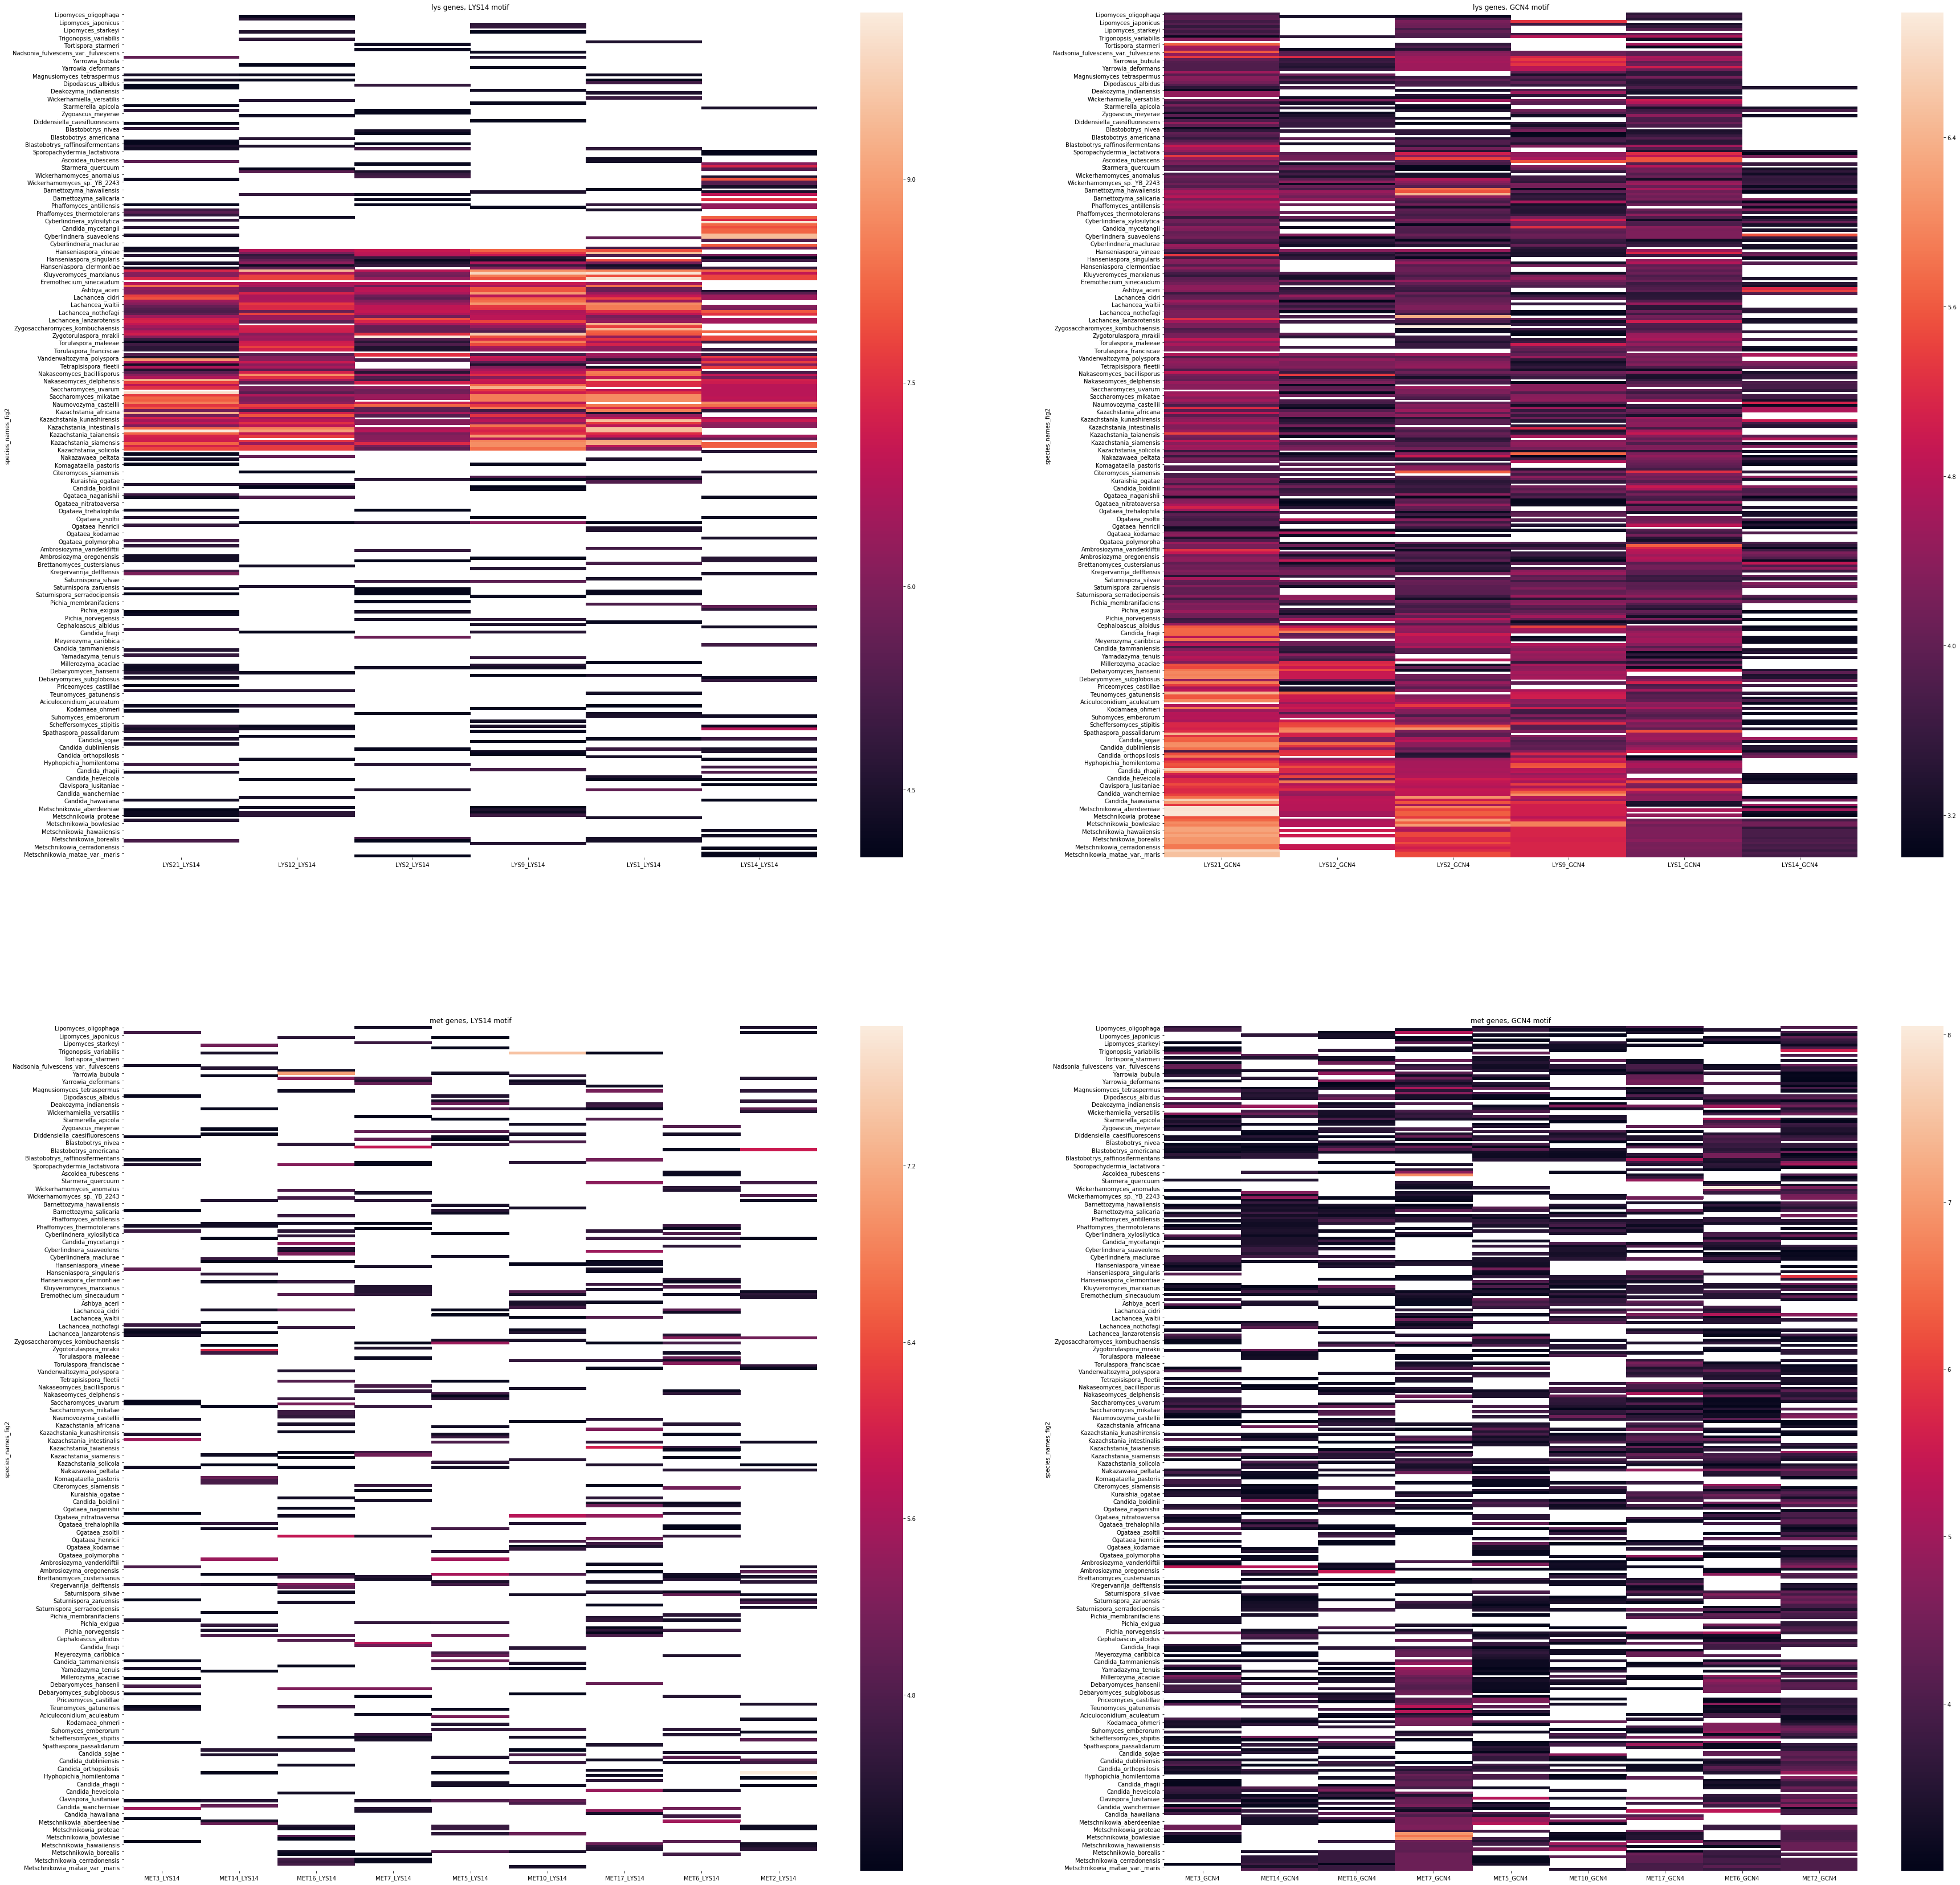

In [467]:
## Select out appropriate columns and visualize heatmap
fig, axarr = plt.subplots(2,2, figsize=(60,60))


for jj, goi_group_name in enumerate(['lys', 'met']):
    for kk, motif_name in enumerate(motif_names):  
        ax = axarr[jj,kk]
        columns_to_view = [goi_common_name + '_' + motif_name for goi_common_name in goi_groups[goi_group_name]]
        sns.heatmap(species_data_matrix.loc[:,columns_to_view], ax=ax)
        ax.set_title(goi_group_name + ' genes, ' + motif_name + ' motif')

fig.savefig(base_dir + os.path.normpath('/data/gcn4_liron/20190422_lys_met_genes_gcn4_lys14.svg'))

In [432]:
N_orth = []

species = 'yHMPu5000035044_barnettozyma_californica_160519'
motif_names =  ['LYS14', 'GCN4']
min_motif_pval = {motif_name:[] for motif_name in motif_names}


spec_proms = goi_hits[goi_hits['species']==species]
#Could add length filter here
N_orth_spec = len(spec_proms.index)
N_orth.append(N_orth_spec)
if N_orth_spec==0:  
    print('No orthologs for ' + goi_common_name + ', species ' + species)
    for motif_name in motif_names: 
        min_motif_pval[motif_name].append(None)

else: 
    for motif_name in motif_names: 
        print(motif_name)
        min_motif_pval_spec = np.inf  
        for orth in spec_proms.iterrows():
            pval_list = orth[1]['pval_' + motif_name]
            print(pval_list)
            if len(pval_list)!=0: 
                min_motif_pval_spec = min(min_motif_pval_spec, min(pval_list))
        if min_motif_pval_spec==np.inf: 
            min_motif_pval[motif_name].append(None)
        else:
            min_motif_pval[motif_name].append(min_motif_pval_spec)
            
min_motif_pval
    
        

LYS14
[]
GCN4
[0.00018999999999999998, 0.00035800000000000003]


{'GCN4': [0.00018999999999999998], 'LYS14': [None]}

In [424]:
min(orth[1]['pval_' + motif_name])

0.00018999999999999998

In [448]:
N_orth = []

motif_names =  ['LYS14', 'GCN4']
min_motif_pval = {motif_name:[] for motif_name in motif_names}


for species_name, (genome_name) in species_data_matrix.itertuples():   
    spec_proms = goi_hits[goi_hits['species']==genome_name]
    #Could add length filter here
    N_orth_spec = len(spec_proms.index)
    N_orth.append(N_orth_spec)
    if N_orth_spec==0:  
        print('No orthologs for ' + goi_common_name + ', species ' + genome_name)
        for motif_name in motif_names: 
            min_motif_pval[motif_name].append(None)

    else: 
        for motif_name in motif_names: 
            min_motif_pval_spec = np.inf  
            for orth in spec_proms.iterrows():
                pval_list = orth[1]['pval_' + motif_name]
                if len(pval_list)!=0: 
                    min_motif_pval_spec = min(min_motif_pval_spec, min(pval_list))
            if min_motif_pval_spec==np.inf: 
                min_motif_pval[motif_name].append(None)
            else:
                min_motif_pval[motif_name].append(-np.log10(min_motif_pval_spec))  #take -log10(pval) in this step

species_data_matrix[goi_common_name + '_N_orth'] = N_orth
for motif_name in motif_names:
    species_data_matrix[goi_common_name + '_' + motif_name] = min_motif_pval[motif_name]
    
species_data_matrix
    

No orthologs for LYS4, species yHMPu5000035629_yueomyces_sinensis_160519


original_genome_id  \
species_names_fig2                                                                             
Lipomyces_oligophaga                             yHMPu5000034748_lipomyces_oligophaga_160519   
Lipomyces_suomiensis                             yHMPu5000034742_lipomyces_suomiensis_160519   
Lipomyces_lipofer                                   yHMPu5000034761_lipomyces_lipofer_160519   
Lipomyces_japonicus                               yHMPu5000034758_lipomyces_japonicus_160519   
Lipomyces_doorenjongii                         yHMPu5000034757_lipomyces_doorenjongii_160519   
Lipomyces_kononenkoae                           yHMPu5000034760_lipomyces_kononenkoae_160519   
Lipomyces_starkeyi                                                        lipomyces_starkeyi   
Lipomyces_arxii                                       yHMPu5000034754_lipomyces_arxii_160519   
Lipomyces_mesembrius                             yHMPu5000034749_lipomyces_mesembrius_160519   
Trigonopsis_variabilis                         yHMPu5000035650_trigonopsis_variabilis_160613   
Trigonopsis_vinaria                               yHMPu5000035282_trigonopsis_vinaria_160928   
Botryozyma_nematodophila                     yHMPu5000034655_botryozyma_nematodophila_160519   
Tortispora_starmeri                               yHMPu5000035279_tortispora_starmeri_160928   
Tortispora_ganteri                                 yHMPu5000035654_tortispora_ganteri_160519   
Tortispora_caseinolytica                                            tortispora_caseinolytica   
Nadsonia_fulvescens_var._fulvescens               yHMPu5000034635_nadsonia_fulvescens_160519   
Nadsonia_fulvescens_var._elongata                           nadsonia_fulvescens_var_elongata   
Candida_hispaniensis                             yHMPu5000035633_candida_hispaniensis_160519   
Yarrowia_bubula                                       yHMPu5000035643_yarrowia_bubula_160519   
Yarrowia_keelungensis                                                  yarrowia_keelungensis   
Yarrowia_lipolytica                                                      yarrowia_lipolytica   
Yarrowia_deformans                                                        yarrowia_deformans   
Yarrowia_divulgata                                 yHMPu5000035645_yarrowia_divulgata_160519   
Middelhovenomyces_tepae                       yHMPu5000035665_middelhovenomyces_tepae_160613   
Magnusiomyces_tetraspermus                  yHMPu5000041818_magnusiomyces_tetrasperma_160928   
Saprochaete_clavata                                                      saprochaete_clavata   
Geotrichum_candidum                                                      geotrichum_candidum   
Dipodascus_albidus                                 yHMPu5000034661_dipodascus_albidus_160519   
Dipodascus_geniculatus                         yHMPu5000041822_dipodascus_geniculatus_160928   
Candida_incommunis                                 yHMPu5000035244_candida_incommunis_160928   
...                                                                                      ...   
Candida_fructus                                       yHMPu5000034988_candida_fructus_160519   
Clavispora_lusitaniae                                                  clavispora_lusitaniae   
Candida_blattae                                       yHMPu5000035335_candida_blattae_160928   
Candida_intermedia                                                        candida_intermedia   
Candida_wancherniae                               yHMPu5000041840_candida_wancherniae_160928   
Candida_golubevii                                   yHMPu5000041862_candida_golubevii_160928   
Metschnikowia_bicuspidata_var._bicuspidata                         metschnikowia_bicuspidata   
Candida_hawaiiana                                   yHMPu5000041743_candida_hawaiiana_160928   
Metschnikowia_kipukae                                                  metschnikowia_kipukae   
Metschnikowia_hibisci                     

In [447]:
genome_name

'metschnikowia_matae'

In [439]:
min_motif_pval

{'GCN4': [None,
  None,
  4.3448615651886175,
  None,
  None,
  4.2313618987523851,
  3.0065637695023884,
  3.0065637695023884,
  3.0065637695023884,
  None,
  None,
  4.2211255279972608,
  None,
  None,
  None,
  3.5867002359187481,
  3.5867002359187481,
  4.7471469690201067,
  3.6382721639824069,
  3.6382721639824069,
  3.630784142589857,
  3.7520267336381936,
  3.7520267336381936,
  3.0154726866562074,
  3.6575773191777938,
  None,
  3.6055483191737836,
  3.0376306643299791,
  3.1112590393171073,
  None,
  3.1366771398795441,
  None,
  None,
  3.1837587000082168,
  3.4424927980943423,
  None,
  None,
  4.4089353929735005,
  None,
  3.7878123955960423,
  4.0376306643299786,
  4.5086383061657269,
  3.7904849854573692,
  4.0915149811213505,
  3.744727494896694,
  None,
  3.0428718023231869,
  4.4473317838878064,
  3.3861581781239307,
  None,
  3.1129456219490432,
  3.1567672219019904,
  3.9829666607012197,
  None,
  4.4449055514216811,
  4.6401645176601116,
  6.0141246426916064,
  4.30

In [390]:
hits_dict = {}

y1000_id = '139_5151'
prom_Lprom = y1000_id_to_Lprom[y1000_id]
prom_hits = fimo_hits[fimo_hits['sequence_name']==y1000_id]
locs = []
strands = []
pvals = []
seqs = []

for prom_hit in prom_hits.iterrows():
    #Just recording location of the start of the motif
    strand = prom_hit[1]['strand']
    strands.append(strand)
    if strand == '-':
        locs.append(prom_Lprom-prom_hit[1]['stop'])
    elif strand == '+': 
        locs.append(prom_Lprom-prom_hit[1]['start'])
    seqs.append(prom_hit[1]['matched_sequence'])
    pvals.append(prom_hit[1]['p-value'])

hits_dict[y1000_id]=(locs, strands, pvals, seqs)

    

{'139_5151': ([585, 605, 246],
  ['-', '+', '-'],
  [8.9e-09, 1.21e-05, 0.0009279999999999999],
  ['TAAGGGATGAGTCACACGTAT', 'ATACGTGTGACTCATCCCTTA', 'CTCAGAGTGGCTCACTGGGAA'])}

In [355]:
y1000_id_to_gene_id, y1000_id_to_Lprom = y1000plus_tools.convert_promoters_for_fimo(fname_in)

Lipomyces_oligophaga
Lipomyces_suomiensis
Lipomyces_lipofer
Lipomyces_japonicus
Lipomyces_doorenjongii
Lipomyces_kononenkoae
Lipomyces_starkeyi
Lipomyces_arxii
Lipomyces_mesembrius
Trigonopsis_variabilis
Trigonopsis_vinaria
Botryozyma_nematodophila
Tortispora_starmeri
Tortispora_ganteri
Tortispora_caseinolytica
Nadsonia_fulvescens_var._fulvescens
Nadsonia_fulvescens_var._elongata
Candida_hispaniensis
Yarrowia_bubula
Yarrowia_keelungensis
Yarrowia_lipolytica
Yarrowia_deformans
Yarrowia_divulgata
Middelhovenomyces_tepae
Magnusiomyces_tetraspermus
Saprochaete_clavata
Geotrichum_candidum
Dipodascus_albidus
Dipodascus_geniculatus
Candida_incommunis
Deakozyma_indianensis
Wickerhamiella_cacticola
Wickerhamiella_infanticola
Wickerhamiella_versatilis
Wickerhamiella_domercqiae
Starmerella_bombicola
Starmerella_apicola
Groenewaldozyma_salmanticensis
Zygoascus_ofunaensis
Zygoascus_meyerae
Sugiyamaella_lignohabitans
Spencermartinsiella_europaea
Diddensiella_caesifluorescens
Blastobotrys_muscicola
B

In [ ]:
y1000_ids = dict(scer_lookup.loc[gois,'y1000_id'])

In [409]:
fig2_to_orig


{'Aciculoconidium_aculeatum': 'yHMPu5000034654_aciculoconidium_aculeatum_160519',
 'Alloascoidea_hylecoeti': 'alloascoidea_hylecoeti',
 'Ambrosiozyma_ambrosiae': 'yHMPu5000026137_ambrosiozyma_ambrosiae_160519',
 'Ambrosiozyma_kashinagacola': 'ambrosiozyma_kashinagacola',
 'Ambrosiozyma_maleeae': 'yHMPu5000035040_ambrosiozyma_maleeae_160519',
 'Ambrosiozyma_monospora': 'ambrosiozyma_monospora',
 'Ambrosiozyma_oregonensis': 'yHMPu5000034946_ambrosiozyma_oregonensis_160519',
 'Ambrosiozyma_philentoma': 'yHMPu5000034947_ambrosiozyma_philentoma_160519',
 'Ambrosiozyma_pseudovanderkliftii': 'yHMPu5000035041_ambrosiozyma_pseudovanderkliftii_160519',
 'Ambrosiozyma_vanderkliftii': 'yHMPu5000026145_ambrosiozyma_vanderkliftii_160519',
 'Ascoidea_asiatica': 'ascoidea_asiatica',
 'Ascoidea_rubescens': 'ascoidea_rubescens',
 'Ashbya_aceri': 'ashbya_aceri',
 'Babjeviella_inositovora': 'babjeviella_inositovora',
 'Barnettozyma_californica': 'yHMPu5000035044_barnettozyma_californica_160519',
 'Barnett

In [ ]:
def promoter_scan_fimo(promoters_prefix, motif_name, motif_fname, thresh, motif_in_file='All'): 
    
    promoter_fname =  y1000plus_dir + 'promoter_sets/' + promoters_prefix + '_fimo.fasta'
    fname_prefix = promoters_prefix + '_' + motif_name
    output_dir = y1000plus_dir + 'fimo_results' + os.sep

    if motif_in_file == "All":
        motif_arg = []
    else:
        motif_arg = ["--motif",motif_in_file]
    
    fimo_command = ([ home_dir + "meme/bin/fimo",
                      "--oc", output_dir,
                      "--verbosity", "1",
                      "--thresh", str(thresh)] +
                     motif_arg + 
                     [ motif_fname,
                       promoter_fname]
                   )

    print('fimo command:\n' + ' '.join(fimo_command))

    fimo_output = subprocess.run(fimo_command,stdout = subprocess.PIPE) 

    print("fimo output return code = " + str(fimo_output.returncode))

    #change file prefix and delete output other than .txt file
    files_to_change = ['cisml.xml', 'fimo.html', 'fimo.tsv','fimo.xml', 'fimo.gff']

    for file_to_change in files_to_change: 
        full_file_to_change = output_dir +  file_to_change   
        fimo_fname_out = output_dir + fname_prefix + '_' + file_to_change
        os.rename(full_file_to_change, fimo_fname_out)

    fimo_hits = pd.read_table(output_dir + fname_prefix + '_fimo.tsv',
                         engine='python', skipfooter=4)
    
    return fimo_hits

In [ ]:
#S.Cer
['110_1220']
#C.Alb: 
['12_2207', '12_3565', '12_3977']
met
met_leu

In [320]:

goi_common_name =  'LYS4'

goi = aa_met_genes[aa_met_genes['Scer_gene']==goi_common_name].index[0]
goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
og = goi_og_lookup[goi_y1000_id]
og_genes = og_genes_lookup[og]

#CA
#['12_2207', '12_3565', '12_3977']

#def extract_promoters(L_prom, og, og_genes, y1000_species_subset, fname_string):
#for a given orthogroup, extract promoters and put them into a .fasta file
#L_prom: Length defined for promoter

#Table to look up species by number: 
genome_name_lookup = dict(zip(y1000_species_subset['spec_og_id'],y1000_species_subset['original_genome_id']))

promoter_fname = y1000plus_dir + os.path.normpath('promoter_sets/' + og + '_' + fname_string + '.fasta')

#with open(promoter_fname,'w') as f: 

#for a given set of genes, 
# group by species
og_genes_specs = {spec_gene.split('_')[0]: [] for spec_gene in og_genes}
for y1000_id in og_genes: 
    spec_og_id = y1000_id.split('_')[0]
    og_genes_specs[spec_og_id].append(y1000_id)

#for each species in the group, gather promoters.  Extract promoter, print promoter as a line in a fasta file
#>spec y1000_id gene_id gene_full chrm strand start end L

# for spec_og_id, genes in og_genes_specs.items(): 
spec_og_id = '12'
genes = ['12_2207', '12_3565', '12_3977']

genome_name = genome_name_lookup[int(spec_og_id)]
print(genome_name)         
#if not(genome_name in missing_specs):    
if genome_name=='saccharomyces_cerevisiae': #If S. Cerevisiae, use SGD promoter database
    sc_promoters = pd.read_pickle(base_dir + os.path.normpath('data/Scer_promoters/sc_promoters.pkl'))
    for y1000_id in genes: 
        gene_id = gene_lookup_spec.loc[y1000_id,'gene_id']
        prom_seq = sc_promoters.loc[gene_id,:].prom_seq
        if L_prom>len(prom_seq):
            print('S.Cerevisiae promoter is only ' + str(len(prom_seq)) + ' bases long, but L_prom=' + str(L_prom))
        prom_seq_Ltrim = prom_seq[(700-min(700,L_prom)):]
        sc_common_name = sc_promoters.loc[gene_id,:].sc_common_name
#         f.write('>species=' + genome_name + ' y1000_id=' + y1000_id + ' gene_id=' + gene_id + ' gene_full=' + gene_id+'_'+sc_common_name+ ' L=' + str(len(prom_seq_Ltrim)) + '\n')
#         f.write(prom_seq_Ltrim + '\n')  
elif genome_name=='candida_albicans': #If C alb, use CGD based promoter database
    ca_promoters = pd.read_pickle(base_dir + os.path.normpath('data/Calb_promoters/Calb_promoters.pkl'))
    for y1000_id in genes: 
        gene_id = gene_lookup_spec.loc[y1000_id,'gene_id']
        prom_seq = ca_promoters.loc[gene_id,:].prom_seq
        if L_prom>len(prom_seq):
            print('C.Albicans promoter is only ' + str(len(prom_seq)) + ' bases long, but L_prom=' + str(L_prom))
        prom_seq_Ltrim = prom_seq[(1000-min(1000,L_prom)):]
        print(gene_id)
        print(prom_seq_Ltrim)
#         f.write('>species=' + genome_name + ' y1000_id=' + y1000_id + ' gene_id=' + gene_id + 'L=' + str(len(prom_seq_Ltrim)) + '\n')
#         f.write(prom_seq_Ltrim + '\n') 
else: 
    #load gene_id map based on the species
    gene_lookup_spec_fname = y1000plus_dir + "id_lookups/" + genome_name + '.csv'
    gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')

    # Load GTF for given sequence: 
    gtf_dir = y1000plus_dir + "0_332yeast_genomes/332_genome_annotations/gtf/"
    db_fname = gtf_dir + 'gffutils_dbs/' + genome_name + '.db'

    gtf_db = gffutils.FeatureDB(db_fname)

    #Extract sequences from genome
    genome_dir = y1000plus_dir + "0_332yeast_genomes/332_genome_assemblies/"

    genome_fname = genome_dir + genome_name + '.fas'

    #For each gene, extract all related features, and then output chromosome and coordinates for the promoter
    for y1000_id in genes: 
        gene_full = gene_lookup_spec.loc[y1000_id,'gene_full']
        gene_id = gene_lookup_spec.loc[y1000_id,'gene_id']

        cursor = gtf_db.execute('select * from features where attributes like "%' + gene_full + '%"')
        all_features = cursor.fetchall()
        if len(all_features) == 0:
            print('No features found ' + gene_full + ' ' +genome_name)

        strand = all_features[0]['strand']
        chrom = all_features[0]['seqid']

        starts = []
        ends = []
        for feature in all_features: 
            starts.append(feature['start'])
            ends.append(feature['end'])

        #Adjust coordinates to get L_prom "promoter" sequences
        if strand == '-': 
            prom_end = max(ends) + 1
            prom_start = prom_end + L_prom   #should do min of this and the total length of the scaffold, 
        elif strand == '+': 
            prom_end = min(starts) - 1
            prom_start = max(0,prom_end - L_prom)

        #extract sequences from genome
        #Need to reload the iterator each time
        seq_records = SeqIO.parse(genome_fname, "fasta")
        scaffold_assigned = False

        if genome_name in scaffold_name_change_specs:
            extra_char = scaffold_name_change[genome_name]
            for seq_record in seq_records:
                test_scaffold = ''.join(seq_record.id.split(extra_char))
                if test_scaffold == chrom:
                    scaffold = seq_record
                    scaffold_assigned=True
        else:     
            for seq_record in seq_records:
                test_scaffold = seq_record.id
                if test_scaffold == chrom:
                    scaffold = seq_record
                    scaffold_assigned=True

        assert scaffold_assigned, 'Scaffold not assigned for ' + gene_id + ' in ' + genome_name + ', example scaffold: ' + seq_record.id
        #if strand is negative, check to see if promoter coordinates are at the end of the scaffold

        #if strand is negative, check to see if promoter coordinates are at the end of the scaffold

        L_scaffold = len(scaffold)

        if strand == '-': 
            if prom_start > L_scaffold: 
                print('promoter region extends past the scaffold, genome_name = ' + genome_name + ' Gene = ' + gene_id + ', L_prom = ' + str(L_prom))
                prom_start = L_scaffold
            if prom_end > L_scaffold: 
                print('scaffold ends at the end of the gene, genome_name = ' + genome_name + ' Gene = ' + gene_id)
                prom_end = L_scaffold

            promoter = scaffold.seq[prom_end:prom_start].reverse_complement()
        elif strand == '+': 
            promoter = scaffold.seq[prom_start:prom_end]

#                     f.write('>species=' + genome_name + ' y1000_id=' + y1000_id + ' gene_id=' + gene_id + ' gene_full=' + gene_full +
#                           ' scaffold=' + chrom + " strand=" + strand + " start=" + str(prom_start) + ' end=' + str(prom_end) +  ' L=' + str(abs(prom_end-prom_start)) + '\n')
#                     f.write(str(promoter.upper()) + '\n')  #I wonder why some of the bases were in lower case
    
#     return 

candida_albicans
C7_01570C_A
AATATTCAAAGTAACATAAAAATATAATACCACTTATACACCAAAGAAGTTTAATAGAGTGTAGATTTGTTGCTGTTGTAGATAATTTGATTGATTTTTTGGGGTGTTCGTGTTTAACTTTTGGGATTCAATTGTTTTCTGAAATCAAAAGAAGAAAAGAAAAAAATTTCGTGAACAACCAAAAAAAAAAAAGAAAAGAAAGCGCTTCAAACGAGTCGCGTCTCAATTACCAAAAAAAAAGATAAAAAAATTGTTTGAACGTGACAAGACACGATATGCCCTGCTTACATAATCAAAAAGTTTATTAACTTCTTTTCAGAGAAAAATTATCAAAGCAAAGGCTGCATTATGCTTGATGCAAATACAGGGAGCATACTGCTGTTAAGAGGGTTTTTTTTTTTGGTAGTGGTAGTGGTAATAATAATGATGTTGGTTGGAAATATAATAAATTTCACAAGACAACTTACTACTTCTTGGTGGGGGGAAGGACCAACTAATATTTTTTCTCTCTTATTGTTGTTGATGTTGGTTGTTGATGAACAAACAAAAAGAGGTTCCATCTCTCTCACTTTGCAACTATCTCTTGTATCTTAAACCCTATACTAACAGAGAGAGAAGAAAAAAAAGTTTAGTTTATAAGCATCTTTCAGTCACTTTTTTCTTTACCCACTACTACTGAATGGTCTAATATTCCATTAAG
C4_04410C_A
CAGTTTTTTATTTGATTCTTAAATGTAATCAACTCTTACGAGAGTAATTTATGACCATTCATGCCAACAGATACAGCTATATCTATAAATCCAATCTATATACTCTAGAACGTTAAAGTAAATGTTAGTTTTTATTTCCTTTGCACTAAAGTATGCAACTAAACATTAACACTATCATTGATGTCTGGAGTTTACTAGAATTGACAAAGACAAACAAAATCAATTATATAAGACAAGATCACGTGACAAAGTATAACC

In [310]:
##Parse file to get C_albicans promoters. 
fname = base_dir + os.path.normpath('data/Calb_promoters/C_albicans_SC5314_A22_current_orf_genomic_1000.fasta')
seq_records = SeqIO.parse(fname, "fasta")

prom_dict = {}
for seq_record in seq_records:
    gene_id = seq_record.id
    prom_seq = seq_record.seq[0:1000]
    gene_seq = seq_record.seq[1000:-1000]
    prot_seq = gene_seq.translate()
    if len(prot_seq)==0: 
        print('Gene ' + gene_id + ' has protein sequence length 0')
    else: 
        if prot_seq[0] != 'M': 
            print('Gene ' + gene_id + ' does not start with a start codon')
        if prot_seq[-1] != '*': 
            print('Gene ' + gene_id + ' does not end with a stop codon')
        #Don't save these translations because it is a CUG/SER clade. 
    prom_dict[gene_id] = (str(prom_seq), str(gene_seq))

    
ca_promoters = pd.DataFrame.from_dict(prom_dict, orient='index', columns=['prom_seq', 'gene_seq'])

ca_proms_fname = base_dir + os.path.normpath('data/Calb_promoters/Calb_promoters.pkl')
with open(ca_proms_fname, 'wb') as f: 
    pickle.dump(ca_promoters, f)





/home/lab/envs/seqanalysis/lib/python3.5/site-packages/Bio/Seq.py:2309: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


Gene C3_03580C_A does not end with a stop codon
Gene C4_00270W_B does not end with a stop codon
Gene C2_00260C_A does not end with a stop codon
Gene C2_08320C_B does not end with a stop codon
Gene C2_07530C_B does not end with a stop codon
Gene C1_11060C_A does not end with a stop codon
Gene CR_06690C_A does not end with a stop codon
Gene C2_04440W_A does not end with a stop codon
Gene C1_08840W_B does not end with a stop codon
Gene C4_06010C_B does not end with a stop codon
Gene C7_02610C_B does not end with a stop codon
Gene CR_05580C_A does not end with a stop codon
Gene C7_02610C_A does not end with a stop codon
Gene C2_05770W_B does not end with a stop codon
Gene C2_08300C_A does not end with a stop codon
Gene C1_11320C_A does not end with a stop codon
Gene C6_02930W_B does not end with a stop codon
Gene CR_08520C_B does not end with a stop codon
Gene C1_11030W_A does not end with a stop codon
Gene C1_06900C_B does not end with a stop codon
Gene C1_00280C_B does not start with a s

Gene C4_01480C_A does not end with a stop codon
Gene C2_05520W_B does not end with a stop codon
Gene C3_07560W_B does not end with a stop codon
Gene C1_14290C_A does not end with a stop codon
Gene C1_04520C_B does not end with a stop codon
Gene CR_01550C_A does not end with a stop codon
Gene C3_07430W_B does not end with a stop codon
Gene CR_06350C_A does not start with a start codon
Gene C6_01820C_A does not end with a stop codon
Gene CR_04550W_B does not end with a stop codon
Gene C7_02430C_B does not end with a stop codon
Gene C4_01270W_A does not end with a stop codon
Gene C6_01610W_B does not end with a stop codon
Gene C2_04110W_B does not end with a stop codon
Gene C5_03080C_B does not start with a start codon
Gene C5_04720C_B does not end with a stop codon
Gene C7_01610W_B does not end with a stop codon
Gene C1_03110W_A does not end with a stop codon
Gene CR_00820C_B does not end with a stop codon
Gene C5_01420W_A does not end with a stop codon
Gene C7_01850C_A does not end with

Gene CR_03420C_A does not end with a stop codon
Gene C1_10750C_A does not end with a stop codon
Gene C2_05900W_A does not end with a stop codon
Gene C5_03040W_B does not start with a start codon
Gene C5_01990W_A does not start with a start codon
Gene C2_06390C_B does not end with a stop codon
Gene C2_05410W_A does not end with a stop codon
Gene C1_00270W_A does not end with a stop codon
Gene CR_04020C_B does not end with a stop codon
Gene C4_05570C_A does not end with a stop codon
Gene C1_00710C_B does not end with a stop codon
Gene C3_07130W_B does not end with a stop codon
Gene C2_04770W_A does not end with a stop codon
Gene C2_08380C_A does not end with a stop codon
Gene C3_01890C_B does not end with a stop codon
Gene C1_10960W_A does not end with a stop codon
Gene C1_13590W_B does not end with a stop codon
Gene C3_01630W_B does not end with a stop codon
Gene C6_00970C_A does not start with a start codon
Gene C6_00970C_A does not end with a stop codon
Gene C1_09100W_A does not end w

Gene C5_03970W_B does not end with a stop codon
Gene CR_03010C_A does not end with a stop codon
Gene C1_12700W_B does not start with a start codon
Gene C6_01820C_B does not end with a stop codon
Gene C2_03340W_B does not end with a stop codon
Gene C1_06450C_A does not end with a stop codon
Gene CR_02530W_B does not end with a stop codon
Gene C1_00440W_B does not end with a stop codon
Gene C2_01880C_A does not end with a stop codon
Gene CR_01550C_B does not end with a stop codon
Gene C7_03180C_B does not end with a stop codon
Gene C4_04390W_A does not end with a stop codon
Gene CR_06350C_B does not start with a start codon
Gene C1_11060C_B does not end with a stop codon
Gene CR_03260W_A does not end with a stop codon
Gene CR_09440C_A does not end with a stop codon
Gene C4_02320C_B does not end with a stop codon
Gene C2_02670C_A does not end with a stop codon
Gene C3_04500C_B does not end with a stop codon
Gene C7_00960W_A does not end with a stop codon
Gene C1_11030W_B does not end with

In [ ]:
#should add this to one of my core libraries, but maybe more like CA one above

#Parse file to get SC promoters. 
fname = base_dir + '\expression_data\sc_promoters\\orf_genomic_1000_all.fasta'
first_time_counter = 0
sc_genes_data = []
counter = 0
with open(fname,'r') as f: 
    for line in f: 
        if line[0]=='>':
            #Process previous set of full sequences except the first time around
            if first_time_counter ==0: 
                first_time_counter = 1
                full_seq = []
            else:
                full_seq = "".join(full_seq)
                prom_seq= full_seq[300:1000]
                gene_seq = full_seq[1000:-1000]
                if len(gene_seq) == 0:
                    #don't include if length of promoter is zero
                    print "didn't include " + sc_genename + " , common name " + sc_common_name + "; only " + str(len(full_seq)) + " base pairs"
                elif gene_seq[0:3] != 'ATG':
                    #don't include genes without a start codon
                    print "didn't include " + sc_genename + " , common name " + sc_common_name + "; no start codon - had " + gene_seq[0:3] + " instead"
                else: 
                    sc_genes_data.append((sc_genename,sc_common_name,prom_seq,gene_seq))
                full_seq = []
            #get genename and common name for next go around
            sc_genename = line.split()[0][1:]
            sc_common_name = line.split()[1]
        else: 
            full_seq.append(line.strip())
        counter = counter+1
        #if counter == 1000:
        #    break
    #process final set of full sequences
    full_seq = "".join(full_seq)
    prom_seq= full_seq[300:1000]
    gene_seq = full_seq[1000:-1000]
    sc_genes_data.append((sc_genename,sc_common_name,prom_seq,gene_seq))

sc_genes, sc_common_names, sc_prom_seqs, sc_gene_seqs = zip(*sc_genes_data)
sc_promoters_dict = {"sc_gene": sc_genes, "sc_common_name":sc_common_names, "prom_seq":sc_prom_seqs, "gene_seq":sc_gene_seqs }
sc_promoters = pd.DataFrame.from_dict(sc_promoters_dict)
sc_promoters = sc_promoters[["sc_gene","sc_common_name","prom_seq","gene_seq"]]
sc_promoters.set_index("sc_gene", inplace = True)

In [468]:
print(t)

Importing io_library.  If autoreload, may need to reset base_dir and data_processing dir 
  io_library.base_dir=base_dir 
 io_library.data_processing_dir = data_processing_dir

         /-Lipomyces_oligophaga
      /-|
     |   \-Lipomyces_suomiensis
     |
   /-|      /-Lipomyces_lipofer
  |  |   /-|
  |  |  |   \-Lipomyces_japonicus
  |   \-|
  |     |   /-Lipomyces_doorenjongii
  |      \-|
  |        |   /-Lipomyces_kononenkoae
  |         \-|
  |           |   /-Lipomyces_starkeyi
  |            \-|
  |              |   /-Lipomyces_arxii
  |               \-|
  |                  \-Lipomyces_mesembrius
  |
  |         /-Trigonopsis_variabilis
  |      /-|
  |     |   \-Trigonopsis_vinaria
  |   /-|
  |  |  |   /-Botryozyma_nematodophila
  |  |   \-|
  |  |     |   /-Tortispora_starmeri
  |  |      \-|
  |  |        |   /-Tortispora_ganteri
  |  |         \-|
  |  |            \-Tortispora_caseinolytica
  |  |
  |  |            /-Nadsonia_fulvescens_var._fulvescens
  |  |         /